# PROYECTO 2 #
# Ingeniería de features, Modelos avanzados e Interpretación de modelos
## PROYECTO: Análisis de mercado inmobiliario ##
### PROBLEMA ###  
Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.
### RESUMEN DEL PROYECTO ###
Aplica transformación de datos y entrena Modelos Avanzados para desarrollar con mayor profundidad tu modelo de Machine Learning. ¿Qué puedes aprender del problema que estás abordando mediante el estudio de tu propio modelo?
### CONSIGNA ###
En este proyecto profundizarás lo desarrollado en el proyecto 01 (“Primer modelo de Machine Learning”). El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?
## PARTE A - Transformación de Datos ###

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Justifica e implementa:

* Detección y eliminación de Outliers

* Encoding

* Imputación de valores faltantes

* Escalado de datos

* Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe.

### 1. Análisis Exploratorio de Datos

1. __Se importan las librerías__ necesarias para trabajar en la consigna.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

2. __Se realiza la carga el dataset__ usando las funcionalidades de Pandas.

In [2]:
properati = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [3]:
properati.shape # Filas y columnas

(146660, 19)

* *El Dataset, cuenta con **146.660 Filas**, y **19 Columnas**.*

In [4]:
properati.head(3) # Primeras 3 instancias (filas)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta


3. __Valores Faltantes:__ se imprimen en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna. En un principio es a mera exposición, ya que por el momento no vamos a descartar ninguno de ellos,ni realizar imputación de datos.

In [5]:
properati.isnull().sum() # Nombres de las columnas y su cantidad de faltantes

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

* *Variables con elementos faltantes:*  
    *1. `Superficie Cubierta` **15%** (21.614);*  
    *2. `Superficie Total` **14%** (20.527);*  
    *3. Latitud y Longitud 7% c/u (10.000 c/u);*  
    *4. Baños 4% (6.000).*

4. __Tipos de propiedad:__ Se explora cuántos tipos de propiedad hay publicados en el dataset y la cantidad de instancias por cada tipo de propiedad.

In [6]:
pd.unique(properati['property_type'])

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

In [7]:
print(properati['property_type'].value_counts())

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


* *En el dataset de Properati se encuentran publicados __10 Tipos de Propiedad__ en la zona geográfica analizada.*  
* *Se destacan:*  
    *1. `Departamento` con 107.326 unidades __(73%)__;*  
    *2. `Casa` con 21.521 (15%);*  
    *3. `PH` con 14.298 instancias (10%).*

Text(0.5, 1.0, 'Número de Publicaciones por Tipo de Propiedad')

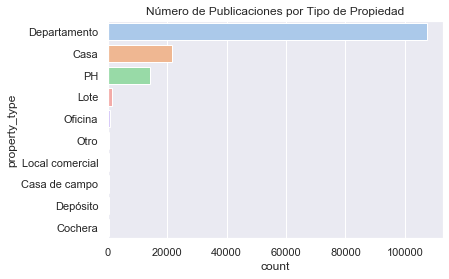

In [8]:
sns.countplot(data = properati, y = 'property_type', order = properati['property_type'].value_counts().index, palette='pastel')
plt.title('Número de Publicaciones por Tipo de Propiedad')

5. __Se visualizan las regiones__ a las cuales pertenecen las publicaciones.

Text(0.5, 1.0, 'Número de Publicaciones por Barrio/Partido de la Provincia de Bs. As')

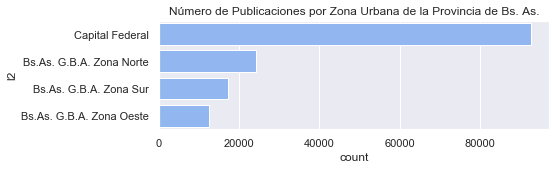

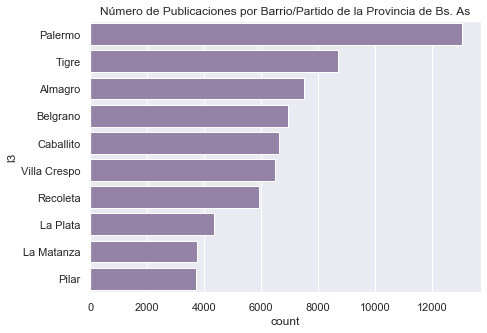

In [9]:
f, ax = plt.subplots(figsize = (7,2))
sns.countplot(y = 'l2', data = properati, order = properati['l2'].value_counts().index, color = '#82B3FF')
plt.title('Número de Publicaciones por Zona Urbana de la Provincia de Bs. As.')

f, ax = plt.subplots(figsize = (7,5))
sns.countplot(y = 'l3', data = properati, order = properati['l3'].value_counts().iloc[:10].index, color = '#957dad')
plt.title('Número de Publicaciones por Barrio/Partido de la Provincia de Bs. As')

In [10]:
print(properati['l2'].value_counts())

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64


In [11]:
print(properati['l3'].value_counts())

Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: l3, Length: 89, dtype: int64


* *Las publicaciones son principalmente de `Capital Federal` **(63%)**.*  
* *Dentro de CABA, se detaca el barrio de `Palermo` (**14%** s/ CABA), seguido por Almagro, Belgrano, Caballito, Villa Crespo y Recoleta.*  
* *Dentro de AMBA, el partido de `Tigre` es el que presenta mayor número de publicaciones.*

6. __Se exponen las Estadísticas Descriptivas__, como ser la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los NaN valores.

In [12]:
pd.set_option('precision', 2) # Para una mejor visualización, se redujeron los decimales a 2

In [13]:
properati[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].describe().round()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,146660.0,146660.0,140703.0,126133.0,125046.0,1.47e+05
mean,3.0,2.0,2.0,217.0,113.0,2.41e+05
std,1.0,1.0,1.0,2038.0,917.0,3.19e+05
min,1.0,0.0,1.0,10.0,1.0,5.50e+03
25%,2.0,1.0,1.0,52.0,47.0,1.11e+05
50%,3.0,2.0,1.0,78.0,68.0,1.66e+05
75%,4.0,3.0,2.0,140.0,108.0,2.65e+05
max,35.0,15.0,14.0,193549.0,126062.0,3.24e+07


* *`Surface Total` y `Surface Covered`: los valores mínimos y máximos obtenidos resultan poco razonables para dichas instancias, ya que como se observa, oscilan entre 10m2 - 193.549m2 y 1m2 - 126.062m2 respectivamente. Al respecto, se observa una `Desviación Estándar Alta`, lo cual indica que los datos se extienden sobre un amplio rango de valores.*
* *`Bedrooms = 0`, es coherente, ya que podría tratarse de `Monoambientes`, donde se comparten en un mismo ambiente, living, cocina y dormitorio.*
* *`Bathrooms = 0`, es lógica por estar trabajando con Depósitos y Lotes por ejemplo, que pueden no tener baños.*
* *`Price`: Los mínimos y máximos distan mucho de la media.*

## 2. Transformación de Datos

### 2.1 Detección y Eliminación de Outliers

1. __Detección de Outliers__ a través de Boxplots, de las variables `Precio`, `Superficie Total` y `Superficie Cubierta` por considerarlas más relevantes y con mayor dispersión de datos s/ las estadísticas descriptivas previamente expuestas.

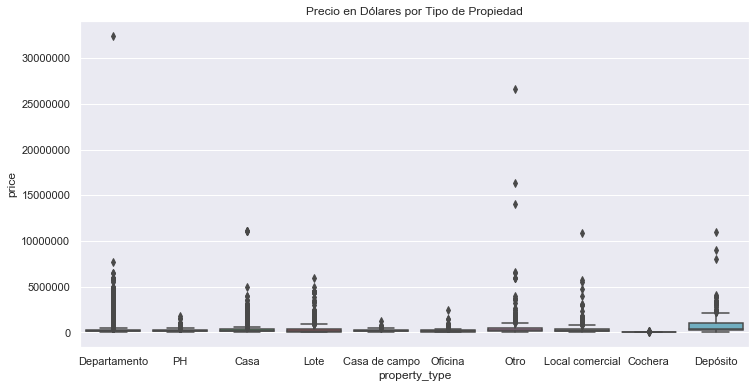

In [14]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati, x = 'property_type', y = 'price')
plt.title('Precio en Dólares por Tipo de Propiedad')
plt.ticklabel_format(axis = 'y', style = 'plain')

Text(0.5, 1.0, 'Superficie Total en m2 por Tipo de Propiedad')

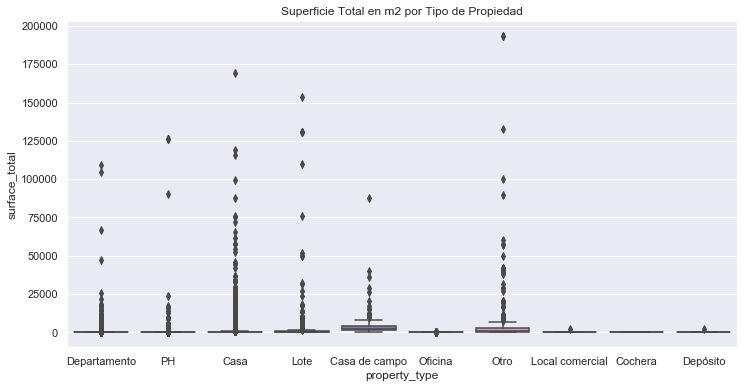

In [15]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati, x = 'property_type', y = 'surface_total')
plt.title('Superficie Total en m2 por Tipo de Propiedad')

Text(0.5, 1.0, 'Superficie Cubierta en m2 por Tipo de Propiedad')

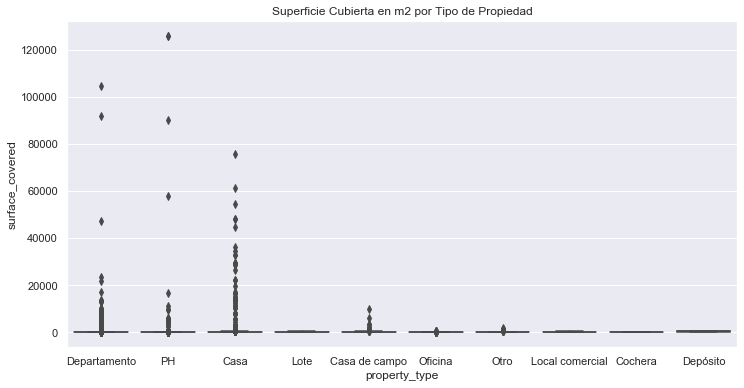

In [16]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati, x = 'property_type', y = 'surface_covered')
plt.title('Superficie Cubierta en m2 por Tipo de Propiedad')

* *Tanto en `Precio` como en `Superficie Total` se visualizan una gran cantidad de outliers.*
* *En el caso de `Precio`, los outliers más distantes de la media (por encima de ella) se observan en `Departamento` y `Otro`.*
* *En el caso de `Superficie Total`, los outliers más distantes de la media se observan en `Departamento`, `Lote` y `Otro`.*
* *`Superficie Cubierta` presenta outliers principalmente en `Departamento`, `Casa` y `PH`.*
* *También se observan valores **Nulos**, lo cual no es consistente.*

2. __Eliminación de Outliers:__ se procede a descartar los datos atípicos para cada tipo de propiedad.
* *Primero, se realiza un **primer filtro** en el dataset, aplicando **IQR Score**, para la variable `Precio`.*

In [17]:
Q1_p = properati['price'].quantile(0.25)
Q3_p = properati['price'].quantile(0.75)
IQR_p = Q3_p - Q1_p
print (IQR_p) # Se visualiza el IQR para columna precios

154000.0


In [18]:
mask_price = properati [~ ((properati['price'] <(Q1_p - 1.5 * IQR_p)) | (properati['price']> (Q3_p + 1.5 * IQR_p)))]
properati_2 = mask_price

properati_2['price'].describe().round()

count    135678.0
mean     182308.0
std       98600.0
min        5500.0
25%      109000.0
50%      158000.0
75%      238000.0
max      496000.0
Name: price, dtype: float64

In [19]:
properati_2.shape

(135678, 19)

* *Un **7,5%** de los datos resultaron ser atípicos, de acuerdo a la metodología utilizada (IQR Score).*

* *Luego, se procede a filtrar aquellas instancias en las que la `Superficie Cubierta` sea superior a la `Superficie Total`, ya que en la práctica NO es posible que ésto suceda.*

In [20]:
mask_sup = (properati_2['surface_covered'] <= properati_2['surface_total'])
properati_3 = properati_2[mask_sup]
properati_3[['price','surface_total']].describe().round()

,price,surface_total
count,113736.0,113736.0
mean,185204.0,175.0
std,97906.0,1471.0
min,6000.0,10.0
25%,110000.0,50.0
50%,160000.0,73.0
75%,240000.0,120.0
max,496000.0,169000.0


In [21]:
properati_3.shape

(113736, 19)

* *La muestra se redujo casi un **15%** más.*

* *__Análisis:__ se procede a visualizar la nueva distribución de los datos a partir del primer filtro realizado.*

In [22]:
properati_3[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].describe().round()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,113736.0,113736.0,112123.0,113736.0,113736.0,113736.0
mean,3.0,2.0,1.0,175.0,93.0,185204.0
std,1.0,1.0,1.0,1471.0,729.0,97906.0
min,1.0,0.0,1.0,10.0,1.0,6000.0
25%,2.0,1.0,1.0,50.0,45.0,110000.0
50%,3.0,2.0,1.0,73.0,64.0,160000.0
75%,4.0,3.0,2.0,120.0,95.0,240000.0
max,35.0,15.0,14.0,169000.0,126062.0,496000.0


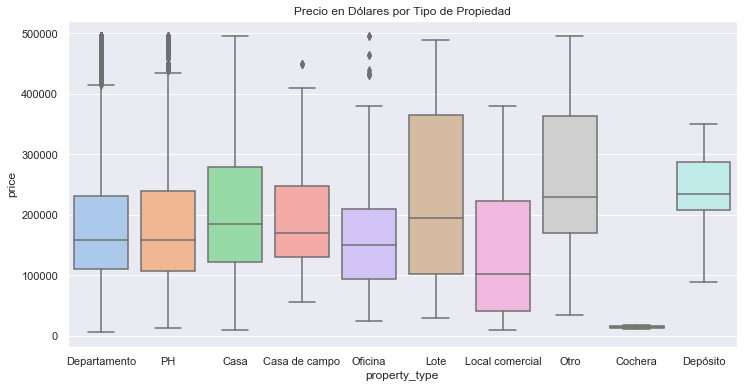

In [23]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati_3, x = 'property_type', y = 'price', palette= 'pastel')
plt.title('Precio en Dólares por Tipo de Propiedad')
plt.ticklabel_format(axis = 'y', style = 'plain')

Text(0.5, 1.0, 'Superficie Total en m2 por Tipo de Propiedad')

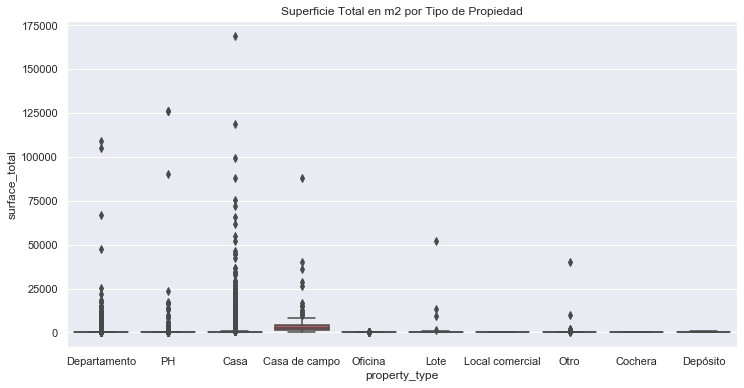

In [24]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati_3, x = 'property_type', y = 'surface_total')
plt.title('Superficie Total en m2 por Tipo de Propiedad')

Text(0.5, 1.0, 'Superficie Cubierta en m2 por Tipo de Propiedad')

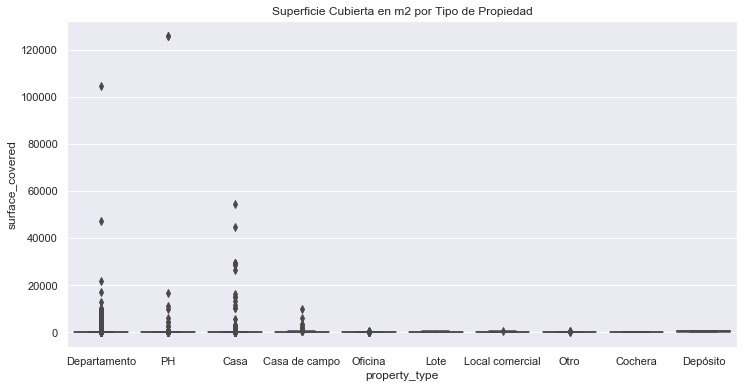

In [25]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati_3, x = 'property_type', y = 'surface_covered')
plt.title('Superficie Cubierta en m2 por Tipo de Propiedad')

* *La distribución de datos de `Precio` expone mayor robustez.*
* *Sin embargo, en los casos de `Superficie Total` y `Superficie Cubierta` los valores atípicos siguien distando mucho de la media, oscilando entre 10m2 - 169.000m2 y 1m2 - 126.062m2 respectivamente. La Desviación Estándar sigue siendo Elevada.*

* *Se realiza un **segundo filtrado**, con el fin de alcanzar valores razonables en las `Superficies`. Comenzamos con `Superficie Total`.*

In [26]:
Q1_st = properati_3['surface_total'].quantile(0.25)
Q3_st = properati_3['surface_total'].quantile(0.75)
IQR_st = Q3_st - Q1_st
print (IQR_st) # Se visualiza el IQR para columna precios

70.0


In [27]:
mask_st = properati_3 [~ ((properati_3['surface_total'] <(Q1_st - 1.5 * IQR_st)) | (properati_3['surface_total']> (Q3_st + 1.5 * IQR_st)))]
properati_4 = mask_st

properati_4['surface_total'].describe().round()

count    102209.0
mean         80.0
std          42.0
min          10.0
25%          49.0
50%          68.0
75%         100.0
max         225.0
Name: surface_total, dtype: float64

In [28]:
properati_4.shape

(102209, 19)

* *En ésta ocación, la muesta fue acotada un **7,5% más**, en comparación al dataset original.*

* *__Nuevo Análisis:__ a fin de observar la robustez de los datos.*

In [29]:
properati_4[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].describe().round()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,102209.0,102209.0,100864.0,102209.0,102209.0,102209.0
mean,3.0,2.0,1.0,80.0,68.0,179640.0
std,1.0,1.0,1.0,42.0,33.0,93863.0
min,1.0,0.0,1.0,10.0,1.0,6000.0
25%,2.0,1.0,1.0,49.0,44.0,110000.0
50%,3.0,2.0,1.0,68.0,60.0,156000.0
75%,3.0,2.0,2.0,100.0,83.0,230000.0
max,35.0,15.0,14.0,225.0,225.0,496000.0


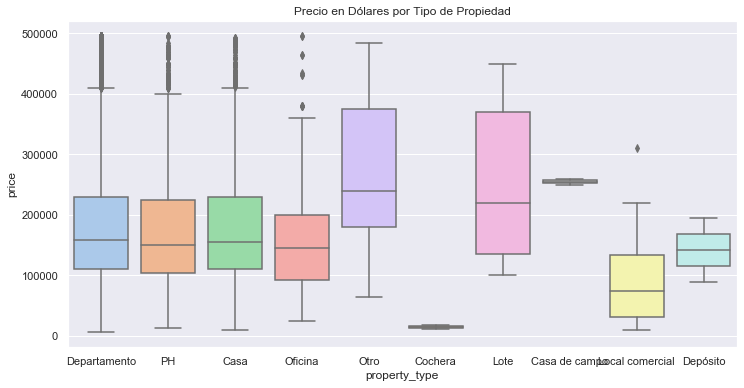

In [30]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati_4, x = 'property_type', y = 'price', palette= 'pastel')
plt.title('Precio en Dólares por Tipo de Propiedad')
plt.ticklabel_format(axis = 'y', style = 'plain')

Text(0.5, 1.0, 'Superficie Total en m2 por Tipo de Propiedad')

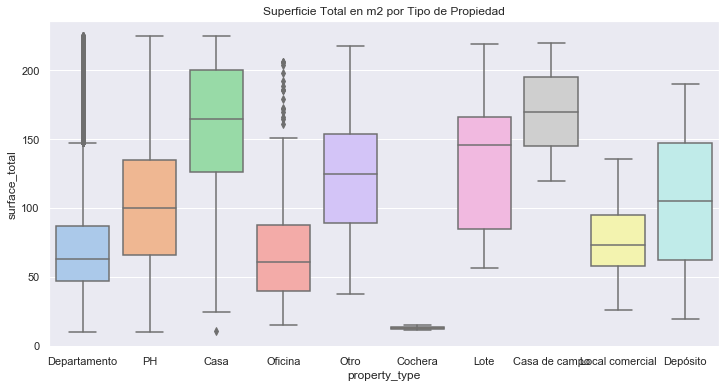

In [31]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati_4, x = 'property_type', y = 'surface_total', palette= 'pastel')
plt.title('Superficie Total en m2 por Tipo de Propiedad')

Text(0.5, 1.0, 'Superficie Cubierta en m2 por Tipo de Propiedad')

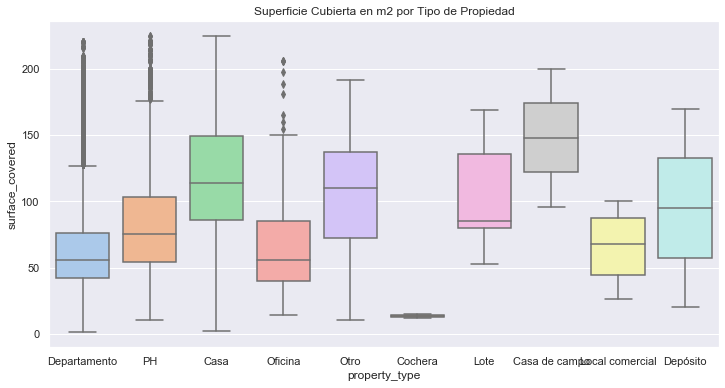

In [32]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati_4, x = 'property_type', y = 'surface_covered', palette= 'pastel')
plt.title('Superficie Cubierta en m2 por Tipo de Propiedad')

* *Ahora sí. Tanto la distribución de datos de `Precio` como de las `Superficies` exponen mayor robustez.*
* *Si bien aún se verifican algunos Outliers principalmente en precios, por cantidad y valores que alcanzan, sólo lo serían por tipo de propiedad y no considerando el conjunto total de los datos.*

### 2.2 Imputación de Valores Faltantes

In [33]:
properati_4.isnull().sum()

start_date            0
end_date              0
created_on            0
lat                6621
lon                6621
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          1345
surface_total         0
surface_covered       0
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

* *Variables que aún cuentan con elementos faltantes:*  
    *1. Latitud y Longitud 6,5% c/u (6.621 c/u);*  
    *2. Baños 1,3% (1.345).*

* *Nos enfocaremos en la imputación de datos de `Baños`, ya que en el próximo paso, trabajaremos con Departamento, Casa y PH (a fin de comparar nuestros resultados con los del Protyecto 1), y no es posible que no hayan Baños en dichos tipos de propiedades (como sí podría ocurrir en un Depósito).*
* *Respecto a latitud y longitud, no se realizará ningún cambio, ya que no serán utilizadas en éste estudio para determinar el precio de las propiedades por la complejidad de su análisis.*

Text(0.5, 1.0, 'Distribución de la variable Baños')

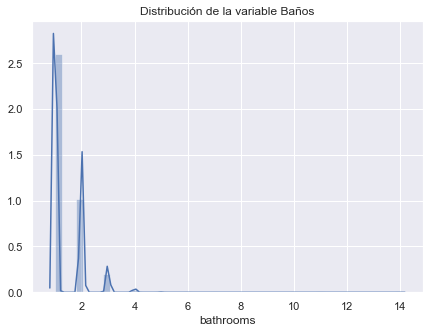

In [34]:
plt.figure(figsize = (7,5))
sns.distplot(properati_4['bathrooms']) 
plt.title('Distribución de la variable Baños')

In [35]:
median_bathrooms = properati_4['bathrooms'].median()
print(median_bathrooms)

1.0


In [36]:
mode_bathrooms = properati_4['bathrooms'].mode()
print(median_bathrooms)

1.0


In [37]:
mean_bathrooms = properati_4['bathrooms'].mean() # Ya espuesto con anterioridad
print(median_bathrooms)

1.0


* *Si bien alguna de las propiedades posee 14 baños, dicho valor atípico no está influyendo en las medidas de tendencia central, ya que la media, la moda y la mediana son igual a **1.0**. A continuación, **se procederá a imputar los datos faltantes con dicho valor**.*
* *Se agrega que la distribución de sus datos es asímétrica a la derecha (positiva), y la cantidad de valores nulos representa un porcentaje bajo sobre el total. Ésto ocurre por la cantidad de valores nulos observados; sin ellos y sin el inmueble con 14 baños, y dados los valores de la media, mediana y moda (iguales entre sí), sería razonable obserbar una distribución normal de los datos en baños.*

In [38]:
properati_4['bathrooms'] = properati_4['bathrooms'].fillna(median_bathrooms)

<ipython-input-38-aa7d24e5b751>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properati_4['bathrooms'] = properati_4['bathrooms'].fillna(median_bathrooms)


In [39]:
sum(pd.isnull(properati_4['property_type']))

0

* *Todos los valores nulos de `Baños` fueron reemplazados por **1.0**, es decir por el valor de la __media, mediana y moda__.*

### 2.3 Selección de la Muestra

* *A fin de **comparar los resultados** de los modelos del Proyecto 2 **con los resultantes del Proyecto 01**, utilizaremos la misma muestra, es decir, que nos centraremos en:*
    * *Los tipos de propiedad con mayor concentración, `Departamento, Casa y PH` y;*
    * *En la región con mayor número de publicaciones, es decir, `Capital Federal`.*

In [40]:
properati_5 = properati_4 [(properati_4['l2'] == 'Capital Federal') & ((properati_4['property_type'] == 'Departamento') | (properati_4['property_type'] == 'PH') | (properati_4['property_type'] == 'Casa'))]

In [41]:
properati_5.shape

(72037, 19)

* *La muestra se redujo en un **8% más**.*

* *Se exponen nuevamente las Estadísticas Descriptivas, con el Dataset Filtrado.*
* *En su revisión, se verifica que se cumpla que la **Superficie Cubierta Mínima sea de 18m2**, basándose en el Nuevo Código de Edificación de CABA, que entró en vigencia el 1° de enero de 2019, y hablitó la construcción de **microambientes mínimos**, de hasta 18 metros cuadrados. Se puede verificar en [Nuevo Código de Edificación](https://www.buenosaires.gob.ar/desarrollourbano/nuevo-codigo-de-edificacion).*

In [42]:
properati_5[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,72037.00,72037.00,72037.00,72037.00,72037.00,72037.00
mean,2.79,1.84,1.38,75.73,66.50,189653.35
std,1.08,0.91,0.64,38.59,32.15,94027.51
min,1.00,0.00,1.00,12.00,2.00,6000.00
25%,2.00,1.00,1.00,47.00,43.00,119300.00
50%,3.00,2.00,1.00,65.00,58.00,165000.00
75%,3.00,2.00,2.00,93.00,81.00,240000.00
max,21.00,15.00,14.00,225.00,225.00,496000.00


* *Mejora la distribución de los datos, presentando una reducción notable en el desvío estándar de los mismos.*
* *No se verifica el cumplimiento de la `Superficie Cubierta Mínima` de 18m2, por lo que a continuación, lo hacemos cumplir:*

In [43]:
mask_sup2 = (properati_5['surface_covered'] >= 18)
properati_6 = properati_5[mask_sup2]

properati_6['surface_covered'].describe().round()

count    71940.0
mean        67.0
std         32.0
min         18.0
25%         43.0
50%         58.0
75%         81.0
max        225.0
Name: surface_covered, dtype: float64

In [44]:
properati_6.shape

(71940, 19)

* *El **Dataset Final con el que vamos a trabajar**, representa aprox. un **49% del Dataset Original**.*
* *Si bien puede parecer un porcentaje bajo, eran muchos los outliers (como propiedades con Sup. Total de 126.062m2) o mal cargados (como Sup. Total < que Sup. Cubierta).*

* *A continuación se reflejan las **nuevas distribuciones** para las `variables Superficie Total` y `Precio`:*

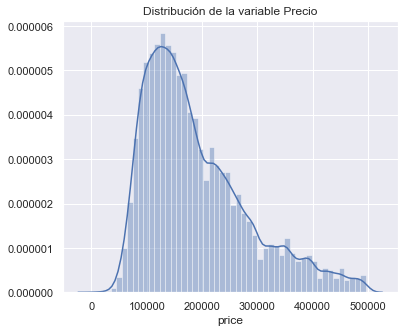

In [45]:
plt.figure(figsize = (6,5))
sns.distplot(properati_6['price'])
plt.title('Distribución de la variable Precio')
plt.ticklabel_format(style = 'plain')

Text(0.5, 1.0, 'Precio en Dólares por Tipo de Propiedad')

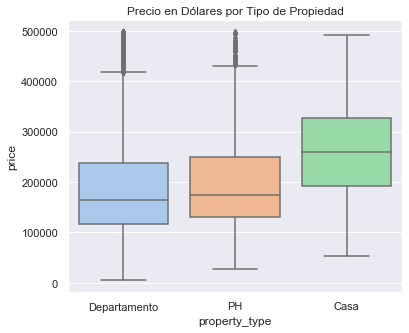

In [46]:
plt.figure(figsize = (6,5))
sns.boxplot(data = properati_6, x = 'property_type', y = 'price', palette= 'pastel')
plt.title('Precio en Dólares por Tipo de Propiedad')

Text(0.5, 1.0, 'Distribución de la variable Superficie Total')

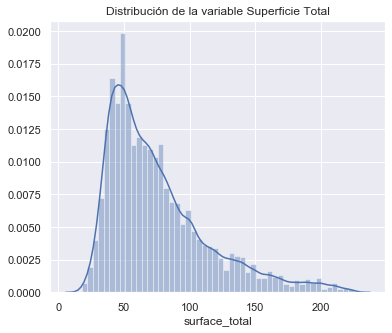

In [47]:
plt.figure(figsize = (6,5))
sns.distplot(properati_6['surface_total']) 
plt.title('Distribución de la variable Superficie Total')

Text(0.5, 1.0, 'Superficie Total en m2 por Tipo de Propiedad')

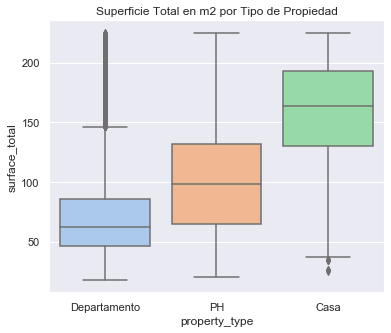

In [48]:
plt.figure(figsize = (6,5))
sns.boxplot(data = properati_6, x = 'property_type', y = 'surface_total', palette= 'pastel')
plt.title('Superficie Total en m2 por Tipo de Propiedad')

Text(0.5, 1.0, 'Distribución de la variable Superficie Cubierta')

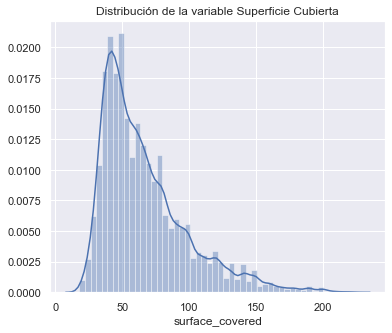

In [49]:
plt.figure(figsize = (6,5))
sns.distplot(properati_6['surface_covered']) 
plt.title('Distribución de la variable Superficie Cubierta')

Text(0.5, 1.0, 'Superficie Cubierta en m2 por Tipo de Propiedad')

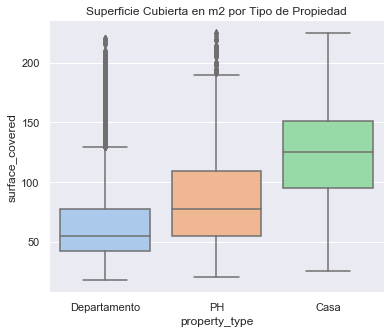

In [50]:
plt.figure(figsize = (6,5))
sns.boxplot(data = properati_6, x = 'property_type', y = 'surface_covered', palette= 'pastel')
plt.title('Superficie Cubierta en m2 por Tipo de Propiedad')

* *Tanto en el caso de Superficie como de Precios, se visualizan datos más consistentes.*
* *En ambos casos, es clara la distribución de datos con **asimetría positiva (o a la derecha)**, siendo la mayor parte de los precios de las propiedades, menores a U$S 250.000.*

In [51]:
#sns.pairplot(data=properati_6, hue= 'property_type', vars=['rooms','bedrooms','bathrooms','surface_total','surface_covered','price'])

* *Podemos inferir que tanto Superficie Total como Superficie Cubierta, están altamente correlacionadas con el Precio, no así el resto de las variables.*

### 2.4 Correlaciones 

1. __Correlaciones Pearson:__ Primero se realiza el estudio de las correlaciones entre las variables `rooms, bedrooms, bathrooms, surface_total, surface_covered` y `price`, con el fin de exponer la existencia de correlaciones lineales.

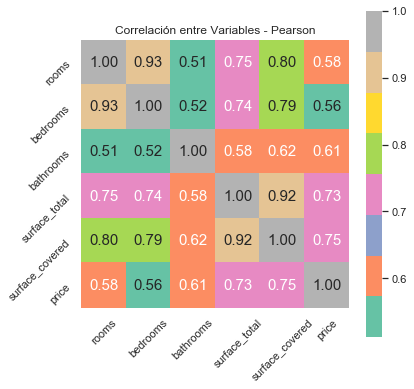

In [52]:
corr = properati_6[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'Set2')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Correlación entre Variables - Pearson')
plt.show()

* *Se observa:*
    * *Correlación Alta **(0.93)**, entre `rooms` (ambientes) y `bedrooms` (dormitorios).*
    * *Correlación Alta **(0.92)**, entre `surface_covered` (superficie total) y `surface_total` (superficie cubierta).*
    * *Además, `surface_covered` y `surface_total`, tiene Correlación Alta y Moderadamente Alta, con todas las demás variables, excepto `bathrooms`.*
* *Por su parte, `Price` posee una correlación Moderadamente Alta con `surface_covered` **(0.75)** y `surface_total` **(0.73)**, coincidiendo con lo esperado, respecto a ser las __variables más relevantes para determinar el precio de los inmuebles__.*

2. __Correlaciones Spearman:__ Para adicionar información al estudio, se expone la correlación a través del método Spearman, con el fin de visualizar la existencia de correlaciones No lineales.

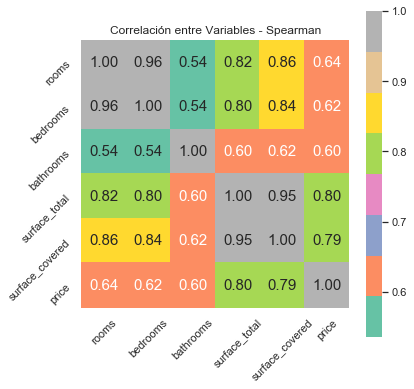

In [53]:
corr = properati_6[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].corr(method='spearman')
plt.figure(figsize=(6,6))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'Set2')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Correlación entre Variables - Spearman')
plt.show()

* *No se observan importantes cambios entre ambos tipos de correlaciones.*
* *Se mantienen las Altas correlaciones entre `rooms` (ambientes) y `bedrooms` (dormitorios), y entre `surface_covered` (superficie total) y `surface_total` (superficie cubierta).*
* `surface_covered` y `surface_total`, incrementan su correlación positiva con`rooms` y `bedrooms`*.
* *Por su parte, `Price` (precio) posee una correlación algo mayor con `surface_covered` **(0.79)** y `surface_total` **(0.80)**.*

### 2.5 Escalado de Datos

* *Primero, se analiza si algunas de las variables requiere escalado.*

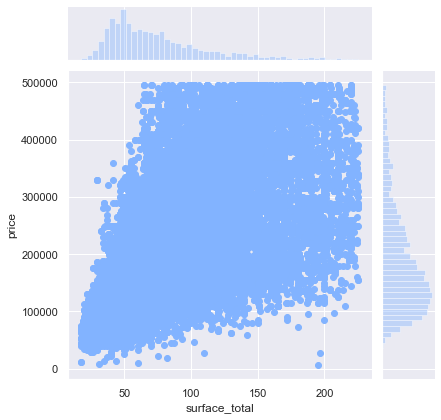

In [54]:
sns.jointplot(x='surface_total', y='price', data=properati_6, color = '#82B3FF')

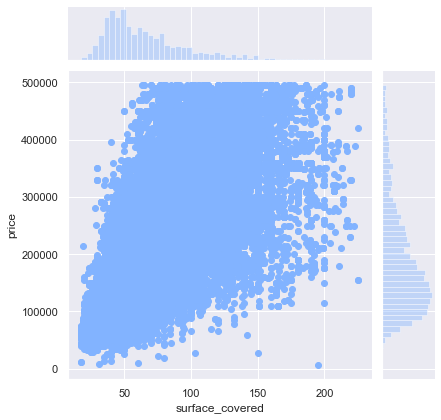

In [55]:
sns.jointplot(x='surface_covered', y='price', data=properati_6, color = '#82B3FF')

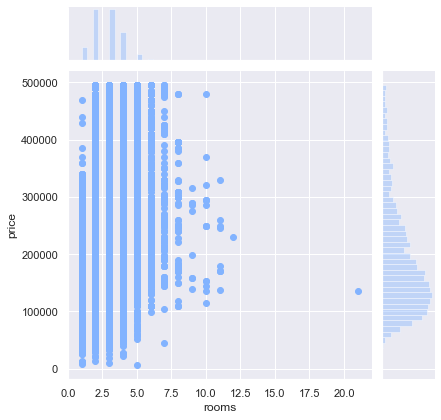

In [56]:
sns.jointplot(x='rooms', y='price', data=properati_6, color = '#82B3FF')

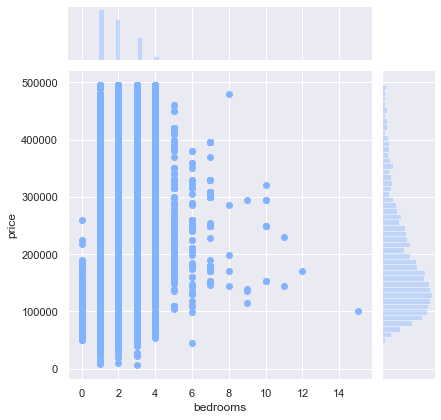

In [57]:
sns.jointplot(x='bedrooms', y='price', data=properati_6, color = '#82B3FF')

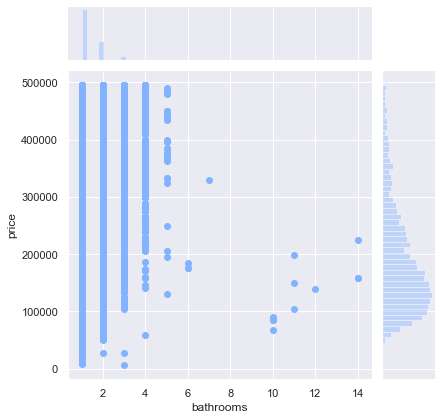

In [58]:
sns.jointplot(x='bathrooms', y='price', data=properati_6, color = '#82B3FF')

* *En `Rooms`, `Bedrooms` y `Bathrooms` parece preciso aplicar escalado a sus datos, por observarse en ellos, valores atípicos muy grandes que pueden degradar el rendimiento predictivo de los algoritmos de aprendizaje automático.*
* *Igualmente, el escalado de datos, **se realizará para las 5 características** previamente expuestas en los gráficos y para `Precio`, con el fin de **normalizar sus datos**, dentro de un rango particular.*
* *Se procede a realizar dicho proceso a través de **RobustScaler**, ya que, a diferencia de StandardScaler, sus estadísticas de centrado y escalado, se basan en percentiles y, por lo tanto, no están influenciadas por unos pocos valores atípicos marginales muy grandes (como en Baños). En consecuencia, el rango resultante de los valores de las características transformadas es mayor que para StandardScaler y son aproximadamente similares.*

In [59]:
from sklearn.preprocessing import RobustScaler

properati_scaler = RobustScaler().fit_transform(properati_6[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']])

properati_scaler.shape

(71940, 6)

In [60]:
properati_7 = pd.DataFrame(properati_scaler, index = properati_6[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].index,
                         columns = properati_6[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].columns)

* *Los datos que utilizaremos en los siguientes modelos, han sido escalados.*

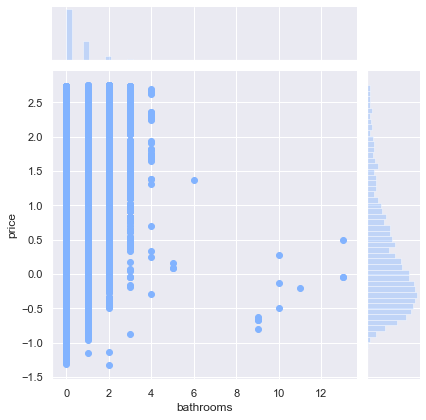

In [61]:
sns.jointplot(x='bathrooms', y='price', data=properati_7, color = '#82B3FF')

* *Teniendo como ejemplo a Baños, la distribución es similar.*
* *Sin embargo, los datos de todas las variables elegidas, han sido normalizados tal cual esperábamos.*

In [62]:
properati_7.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,4.0,5.0,1.0,1.63,2.16,-0.10
1,-1.0,-1.0,1.0,0.11,0.00,-0.05
2,-1.0,-1.0,0.0,-0.43,-0.34,-0.33
3,-1.0,-1.0,0.0,0.43,-0.21,1.08
5,-1.0,-1.0,0.0,-0.20,-0.05,-0.12


* *El **Dataset Escalado**, incluye únicamente las columnas de `rooms, bedrooms, bathrooms, surface_total, surface_covered` y `price`.*

### 2.6 Aplicación de Reducción de Dimensionalidad - PCA

* *Se implementa la técnica de PCA, ya que es particularmente útil en el tratamiento de datos donde existen múltiples - colinealidades entre las características / variables, como ocurre en el presente estudio.*

* *Como **X** vamos a considerar las 5 variables escaladas que sirven como predictoras, con el fin de luego reducir su dimensionalidad y como **y** al Precio.*
* *Como se expuso anteriormente, entre ellas existen múltiples correlaciones, y a su vez, algunas de ellas parece tener influencia en la determinación de los precios (como las superficies), y otras no (ambientes, dormitorios y baños).*

1. Se **seleccionan las variables** predictoras (`X`) y la variable a predecir (`y`).

In [63]:
X = properati_7[['surface_total','surface_total','bedrooms','rooms','bathrooms']]
y = properati_7[['price']]

In [64]:
X[:5]

,surface_total,surface_total,bedrooms,rooms,bathrooms
0,1.63,1.63,5.0,4.0,1.0
1,0.11,0.11,-1.0,-1.0,1.0
2,-0.43,-0.43,-1.0,-1.0,0.0
3,0.43,0.43,-1.0,-1.0,0.0
5,-0.20,-0.20,-1.0,-1.0,0.0


2. Se define la **matriz de Covarianza**.

In [65]:
# Matriz de covarianza
features = X.T
cov_matrix = np.cov(features)
cov_matrix[:5]

array([[0.70289414, 0.70289414, 0.56187297, 0.67827831, 0.31208399],
       [0.70289414, 0.70289414, 0.56187297, 0.67827831, 0.31208399],
       [0.56187297, 0.56187297, 0.82706199, 0.91129875, 0.30205901],
       [0.67827831, 0.67827831, 0.91129875, 1.15535972, 0.35347466],
       [0.31208399, 0.31208399, 0.30205901, 0.35347466, 0.4111833 ]])

* En la diagonal de la matriz de covarianzas, tenemos varianzas, y los demás elementos son las covarianzas.
* Los elementos diagonales son idénticos y la matriz es simétrica.

3. Se realiza la **Eigendecomposition**.

In [66]:
# Eigendecomposition
valores, vectores = np.linalg.eig (cov_matrix) 
valores [: 5]

array([3.08587291e+00, 4.04880314e-01, 2.43668277e-01, 2.65090161e-16,
       6.49717812e-02])

In [67]:
vectores [: 5]

array([[-4.36934654e-01, -4.88581876e-01, -2.64926194e-01,
         7.07106781e-01, -1.37829992e-02],
       [-4.36934654e-01, -4.88581876e-01, -2.64926194e-01,
        -7.07106781e-01, -1.37829992e-02],
       [-4.81141824e-01,  4.28566042e-01,  4.28867253e-02,
        -8.21940196e-16, -7.63540714e-01],
       [-5.76727269e-01,  5.01776843e-01, -7.74499912e-03,
         7.54995869e-16,  6.44628320e-01],
       [-2.32517567e-01, -2.95172237e-01,  9.26136581e-01,
         4.80178534e-16,  3.28628111e-02]])

* *A partir de esto, podemos calcular el porcentaje de varianza explicada (explained variance) por componente principal:*

In [68]:
varianzas_explicadas = [] 
for i in range (len (valores)): 
    varianzas_explicadas.append (valores [i] / np.sum (valores)) 
 
    print (np.sum (varianzas_explicadas), '\n', varianzas_explicadas)

0.812201496837227 
 [0.812201496837227]
0.918765962143357 
 [0.812201496837227, 0.10656446530613012]
0.9828994325328348 
 [0.812201496837227, 0.10656446530613012, 0.06413347038947786]
0.982899432532835 
 [0.812201496837227, 0.10656446530613012, 0.06413347038947786, 6.977170860227111e-17]
0.9999999999999998 
 [0.812201496837227, 0.10656446530613012, 0.06413347038947786, 6.977170860227111e-17, 0.017100567467164863]


* *El primer valor es solo la suma de las varianzas explicadas y debe ser igual a 1. El segundo valor es una matriz, que representa el porcentaje de varianza explicada por componente principal.*
* *El primer componente principal representa el 81% de la varianza de los datos, el segundo el 11%.*

* 4. **Visualizaciones**.

In [69]:
proyectado_1 = X.dot (vectores.T [0]) 
proyectado_2 = X.dot (vectores.T [1])
res = pd.DataFrame (proyectado_1, columns = ['PC1']) 
res ['PC2'] = proyectado_2 
res ['Y'] = y 
res.head ()

,PC1,PC2,Y
0,-6.37,2.26,-0.10
1,0.73,-1.33,-0.05
2,1.44,-0.51,-0.33
3,0.68,-1.36,1.08
5,1.23,-0.74,-0.12


* *Primero se visualiza el conjunto de datos en una dimensión: como una línea.*

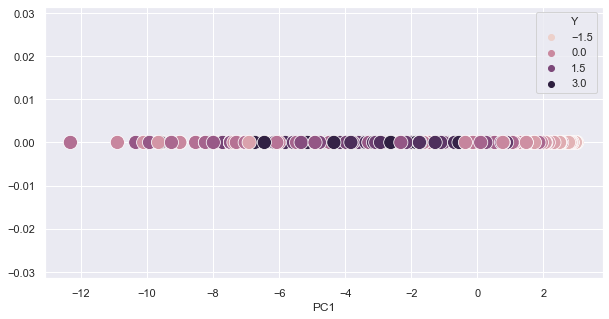

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.scatterplot (res ['PC1'], [0] * len (res), hue = res ['Y'], s = 200)

* *Luego, se exponen los datos en un espacio 2D:*

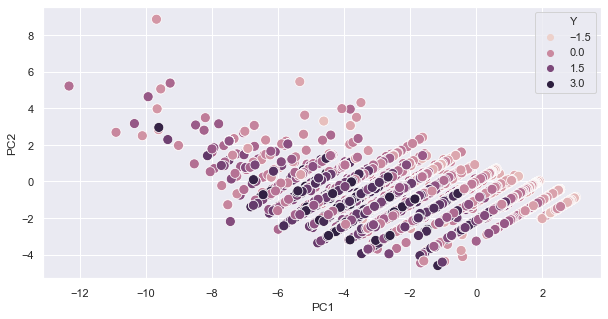

In [71]:
plt.figure (figsize = (10, 5)) 
sns.scatterplot(res['PC1'], res['PC2'], hue=res['Y'], s=100)

* *En ambos gráficos se observa que las variables son difíciles de separar.*

5. Vemos cómo funciona el **modelo PCA**, con 2 componentes principales.

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (71940, 5)
transformed shape: (71940, 2)


In [73]:
print(pca.components_)

[[ 0.43693465  0.43693465  0.48114182  0.57672727  0.23251757]
 [-0.48858188 -0.48858188  0.42856604  0.50177684 -0.29517224]]


* *Los datos transformados se han reducido a una sola dimensión. Para comprender el efecto de esta reducción de dimensionalidad, podemos realizar la transformación inversa de estos datos reducidos y trazarlos junto con los datos originales.*
* *La reducción de dimensionalidad de PCA, eliminó la información a lo largo del eje o ejes principales menos importantes, dejando solo el componente o componentes de los datos con la mayor varianza, en éste caso, el primer y segundo componente.*
* *Este conjunto de datos de dimensión reducida es, en algunos sentidos, "lo suficientemente bueno" para codificar las relaciones más importantes entre los puntos: a pesar de reducir la dimensión de los datos, la relación general entre los puntos de datos se conserva en su mayoría.*

## 3. Entrenamiento del modelo implementado en la Entrega 01 - Árbol de Decisión

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.30, random_state=42)

In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

lista_rmse_train_dt = []
lista_rmse_test_dt = []

max_depths = [1,2,3,4,5,6,7,8,9,10,20,25,30,40,50,80]

for max_depth in max_depths:

    # Se define el modelo con la profundidad deseada
    tree_regressor = DecisionTreeRegressor(max_depth = max_depth, random_state=10)
    
    tree_regressor.fit(X_train, y_train)
    
    y_train_pred = tree_regressor.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    y_test_pred = tree_regressor.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    lista_rmse_train_dt.append(rmse_train)
    lista_rmse_test_dt.append(rmse_test)

Text(0.5, 1.0, 'Curva de Validación - Árbol de Decisión')

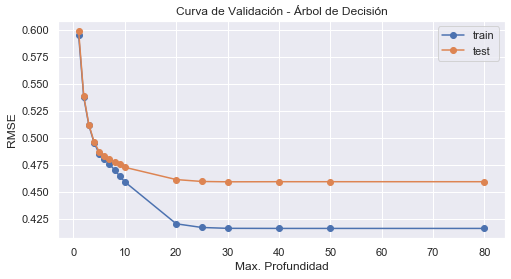

In [76]:
plt.figure(figsize = (8,4))
plt.plot(max_depths, lista_rmse_train_dt,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test_dt,'o-',label='test')
plt.legend()
plt.xlabel("Max. Profundidad")
plt.ylabel("RMSE")
plt.title('Curva de Validación - Árbol de Decisión')

In [77]:
regresor = DecisionTreeRegressor(max_depth=10, random_state=42)
regresor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [78]:
y_train_pred = regresor.predict(X_train)
y_test_pred = regresor.predict(X_test)

In [79]:
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))

0.21071270801940892
0.22302666022379114


In [80]:
regresor.feature_importances_

array([0.86327965, 0.13672035])

* *Los RMSE tanto para Train como para Test, resultan mucho menores a los obtenidos en el Proyecto 1.*

## 4. Evaluación del desempeño del modelo obtenido, luego de transformar los datos.

* *Cabe aclarar, que en la presente transformación de datos, incluímos el escalado de los mismos, lo cual no se realizó en el Proyecto 01.*
* *Es por ello que:*
    * *Con el fin de **comparar bajo las mismas escalas**: se procederá a replicar los modelos realizados en el Proyecto 01, aunque realizando el escalado de sus datos.*
    * *Para sumar una comparación más: se contrastarán los valores originales obtenidos en el Proyecto 01 (sin escalado), con el del Presente Proyecto pero **sin escalar**, es decir, se aplicará el modelo de Árbol de Decisión a partir del dataset **properati_6**.*

### 4.1. Repetimos los modelos aplicados en el Proyecto 01, realizando el Escalado de los Datos

#### 4.1.1 Replicamos los Filtros del Primer Proyecto de Machine Learning (Proyecto 01) y Escalamos los Datos

In [81]:
properati_ml = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [82]:
properati_ml_2 = properati_ml [(properati_ml['l2'] == 'Capital Federal') & ((properati_ml['property_type'] == 'Departamento') | (properati_ml['property_type'] == 'PH') | (properati_ml['property_type'] == 'Casa'))]

In [83]:
properati_ml_3 = properati_ml_2 [(properati_ml_2['surface_total'] >= 15) & (properati_ml_2['surface_total'] <= 1000)]

In [84]:
properati_ml_4 = properati_ml_3 [(properati_ml_3['price'] <= 4000000)]

In [85]:
properati_ml_5 = properati_ml_4.loc[:, ['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]

In [86]:
properati_ml_5.isnull().sum()

rooms                0
bedrooms             0
bathrooms          880
surface_total        0
surface_covered    517
price                0
dtype: int64

In [87]:
properati_ml_5.dropna()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,1.53e+05
1,2.0,1.0,2.0,70.0,58.0,1.59e+05
2,2.0,1.0,1.0,45.0,45.0,1.25e+05
3,2.0,1.0,1.0,85.0,50.0,2.95e+05
5,2.0,1.0,1.0,56.0,56.0,1.50e+05
...,...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0,5.70e+05
146555,3.0,2.0,2.0,144.0,134.0,4.80e+05
146556,4.0,2.0,2.0,317.0,143.0,5.30e+05
146557,3.0,2.0,2.0,145.0,145.0,4.20e+05


__Checkpoint:__ deberías obtener un dataset con 81019 instacias y 6 columnas.

In [88]:
properati_ml_5.shape

(82373, 6)

* *Cabe aclarar, que el Proyecto 01 tiene un **Error**, ya que si bien el Checkpoint dió OK, no fue aplicado el último filtro en un nuevo dataframe, por lo que el total de instancias con las que se trabajó, fue de **82.373**.*
* *A fin de comparar, se utilizará dicho dataset para no modificar los resultados finales*.

In [89]:
properati_scaler_ml = RobustScaler().fit_transform(properati_ml_5[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']])

properati_scaler_ml.shape

(82373, 6)

In [90]:
properati_ml_5_sclaer = pd.DataFrame(properati_scaler_ml, index = properati_ml_5[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].index,
                         columns = properati_ml_5[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].columns)

#### 4.1.2 Regresión Lineal

In [91]:
X = properati_ml_5_sclaer[['rooms','surface_total']]
y = properati_ml_5_sclaer[['price']]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [93]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [94]:
linear_model.fit(X_train, y_train)
print(linear_model.coef_, linear_model.intercept_) # Pendiente y ordenada al origen

[[-0.11351493  1.07564402]] [0.10327176]


* *Se realiza la evaluación del modelo.*
* *Se realiza el `histograma de los errores` ( y−y_predicho ) para cada conjunto y el `gráfico de dispersión` de  y  vs  y_predicho  para el conjunto de test.*

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 1.377420432783204
Raíz del error cuadrático medio en Test: 1.44344452631046


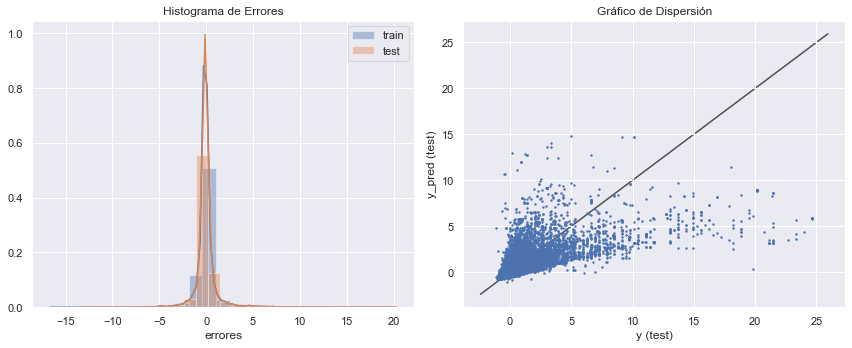

In [95]:
modelo = ['Regresión lineal']

for i, model in enumerate([linear_model]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelo[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (12,5))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 25, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 25, label = 'test')
    plt.xlabel('errores')
    plt.title('Histograma de Errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.title('Gráfico de Dispersión')
    
    plt.tight_layout()
    plt.show()

* *Como se indicó en el proyecto anterior, si bien los histogramas de los errores parecieran ser algo simétricos, no se observan parecidos entre ambos conjuntos, siendo un indicador de que **no** nos estamos aproximando a nuestros datos de manera correcta.*
* *En el gráfico, **y**  vs  **y predicho**  para el conjunto de test, los puntos se van alejando de la diagonal, y el error, parece ser cada vez mayor.*
* *En éste caso, la regresión lineal no estaría haciendo un buen trabajo en reproducir la curva teórica.*

#### 4.1.3. Árboles de Decisión y K Vecinos Más Cercanos

In [96]:
X = properati_ml_5_sclaer[['rooms','surface_total']]
y = properati_ml_5_sclaer[['price']]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [98]:
from sklearn.neighbors import KNeighborsRegressor

In [99]:
tree_regressor = DecisionTreeRegressor(max_depth=25, random_state=10)
knn_regressor = KNeighborsRegressor(n_neighbors=8)

In [100]:
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 0.9551599460879457
Raíz del error cuadrático medio en Test: 1.2588155597465718


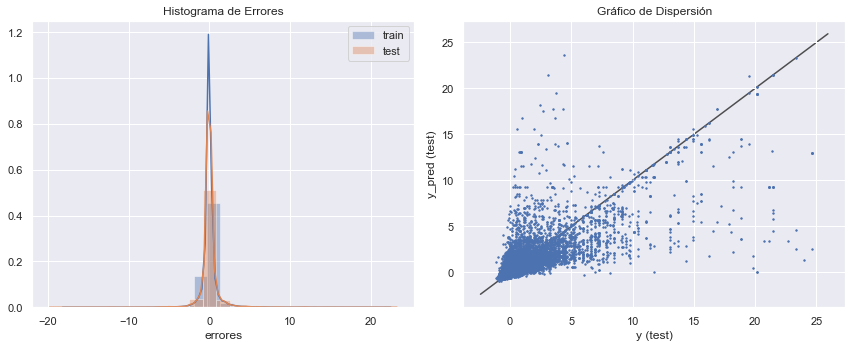

Modelo: K Vecinos Más Cercanos
Raíz del error cuadrático medio en Train: 1.13094946094372
Raíz del error cuadrático medio en Test: 1.2651174341865883


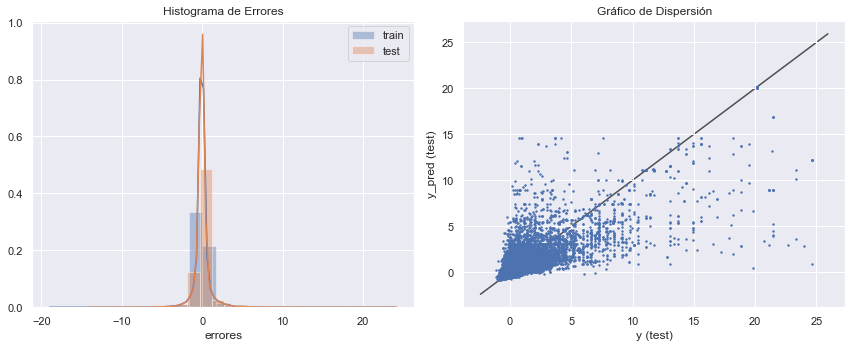

In [101]:
modelos = ['Árbol de Decisión', 'K Vecinos Más Cercanos']
for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train).reshape(57661,1)
    y_test_pred = model.predict(X_test).reshape(24712,1)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (12,5))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 25, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 25, label = 'test')
    plt.xlabel('errores')
    plt.title('Histograma de Errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.title('Gráfico de Dispersión')
    
    plt.tight_layout()
    plt.show()

* *Tanto con Árboles de Decisión como en K Vecinos, los histogramas de los errores no parecen ser simétricos ni parecidos para ambos conjuntos, siendo un indicador de que **no** nos estamos aproximando a nuestros datos de manera correcta.*
* *En los gráficos, **y**  vs  **y predicho**  para el conjunto de test, los puntos se encuentran cada vez más dispersos, y el error, es ser cada vez mayor.*


### 4.2. Modelo de Árbol de Decisión a partir del dataset **properati_6**

In [102]:
X = properati_6[['rooms','surface_total']]
y = properati_6[['price']]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [104]:
tree_regressor = DecisionTreeRegressor(max_depth=10, random_state=42)

In [105]:
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [106]:
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

In [107]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 58351.87033149657
Raíz del error cuadrático medio en Test: 59126.441125741396


### 4.3. Evaluación del Desempeño

                                                    Modelos Con Escalado de Datos

|   Modelo Proyecto 01   | RMSE Train | RMSE Test | Hiperparámetro Utilizado |
|:----------------------:|:----------:|:---------:|:------------------------:|
|    Regresión Lineal    |    1.377   |   1.443   |            --            |
|    Árbol de Decisión   |    0.955   |   1.259   |      max_depth = 25      |
| K Vecinos Más Cercanos |    1.131   |   1.265   |      n_neighbors = 8     |


| Modelo Proyecto 02 | RMSE Train | RMSE Test | Hiperparámetro Utilizado |
|:------------------:|:----------:|:---------:|:------------------------:|
| Árbol de Decisión  |    0.211   |   0.223   |      max_depth = 10      |

                                                    Modelos Sin Escalado de Datos

|   Modelo Proyecto 01   | RMSE Train | RMSE Test | Hiperparámetro Utilizado |
|:----------------------:|:----------:|:---------:|:------------------------:|
|    Regresión Lineal    |  213500.2  |  223733.9 |            --            |
|    Árbol de Decisión   |  148049.8  |  195382.0 |      max_depth = 25      |
| K Vecinos Más Cercanos |  174201.2  |  197995.1 |      n_neighbors = 8     |

| Modelo Proyecto 02 | RMSE Train | RMSE Test | Hiperparámetro Utilizado |
|:------------------:|:----------:|:---------:|:------------------------:|
|  Árbol de Decisión |   58351.9  |  59126.4  |      max_depth = 10      |

* *Según se expone, tanto en el caso de modelos escalados como no escalados, **el Desempeño del Modelo Obtenido del Proyecto 02, es mucho mejor** que los extrtraídos del proyecto anterior.*

* *En los 3 modelos aplicados en el Proyecto 01, los errores RMSE, tienen valores muy altos, por lo que no logran una buena predicción de los precios.*
* *Ésto ocurre, porque los errores RMSE, son sensibles a valores atípicos, y en la muestra del Proyecto 01, tenemos varios, ya que en su oportunidad, no se realizó el filtrado de datos más adecuado para poder reducir los Outliers de la mejor manera posible, ni tampoco imputación de datos o reducción de dimensionalidad*.
* *Además, hay un notable sobreajuste en los modelos ejecutados en el Proyecto 01, visualizado a través de la importante diferencia existente entre el RMSE del Train y del Test (el primero mucho menor).*

## PARTE B - Modelos Avanzados ##

* Elige dos de los modelos avanzados vistos (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

* Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

* Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

* *__Aclaración:__ Los clasificadores basados en modelos gráficos, como Fisher LDA o Naive Bayes, así como los Árboles de decisión y los métodos de conjuntos basados en Árboles (RF, XGB) son invariantes al escalado de características (no lo requieren para converger a los errores mínimos), pero aún así, podría ser una buena idea reescalar / estandarizar su datos.  
Es por ello, que en el presente apartado, se optó por elegir el dataset **properati_7**, el cual incluye el escalado de los datos.*

### 1. Regresión Lineal con Atributos Polinómicos y Regularización

#### 1.1 Regresión Lineal con Atributos Polinómicos

In [108]:
X = properati_7[['bedrooms','surface_total','surface_covered']]
y = properati_7[['price']]

In [109]:
from sklearn.preprocessing import PolynomialFeatures

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [126]:
def evaluar_regresion(model,X,y, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculamos el Error
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    plt.figure(figsize = (17,5))
    
    plt.subplot(1,3,2)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,3,3)
    ax.scatter(y_test,y_test_pred, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()

In [112]:
poly = PolynomialFeatures (3, include_bias = False) # Preprocesamiento, de 'Grado 3'
X_train_new = poly.fit_transform(X_train) # Conjunto de datos que incluye los nuevos atributos, las nueva columnas
X_test_new = poly.fit_transform(X_test)

# Ahora son 3 columnas. Son nuevas combinaciones lineales del atributo original.
# A la vista, elevó a la 1, a la 2, a la 3

In [113]:
reg = LinearRegression()
reg.fit(X_train_new, y_train)
y_train_pred_reg = reg.predict(X_train_new)
y_test_pred_reg = reg.predict(X_test_new)

Raíz del error cuadrático medio en Train: 0.4805334163244839
Raíz del error cuadrático medio en Test: 0.4831882984698387


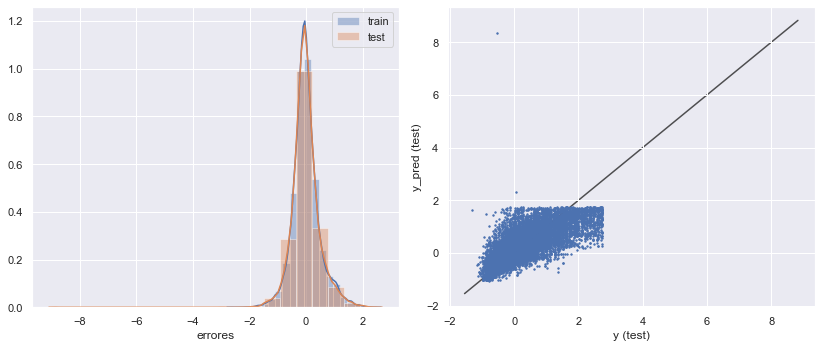

In [127]:
evaluar_regresion(reg, X,y, X_train_new, X_test_new, y_train, y_test)

#### 1.2 Regularización

* *__Regulación L2 o RIDGE:__ Se agrega a la función de Costo, un término proporcional al cuadrado del valor de los coeficientes de peso. La penalización, encoge los coeficientes hacia el Cero.*
    * *El valor de Alpha, puede ser de 0.1 hasta el valor que se desee.*
    * *Cuanto mayor sea el valor de alfa, menos varianza exhibirá su modelo y menor será la dispersión de los datos.*
    * *Funciona bien si hay muchos parámetros grandes de aproximadamente el mismo valor.*
    
* *__Regulación L1 o LASSO:__ Se agrega a la función de Costo, un término proporcional al valor absoluto de los coeficientes de peso. La penalización, encoge los coeficientes hacia el Cero o convierte a algunos coeficientes en Cero. Así, elimina las características menos importantes en nuestro modelo.*
    * *El valor de Alpha, puede variar de 0.1 a 1.*
    * *Tiende a funcionar bien si hay una pequeña cantidad de parámetros significativos y los otros están cerca de cero.*

##### 1.2.1 Se entrena el modelo **Ridge**

In [115]:
from sklearn.linear_model import Ridge, Lasso

reg_ridge = Ridge() # No se incluye alpha, ya que en la consigna se indica entrenar y evaluar con los argumentos por defecto
reg_ridge.fit(X_train_new,y_train)

print(f'Pendientes: {reg_ridge.coef_}')
print(f'Ordenada: {reg_ridge.intercept_}')

Pendientes: [[-1.66720545e-01  8.64394655e-01  3.16524895e-01 -2.73574463e-02
  -4.37711851e-03  2.60032682e-02 -9.49205539e-01  1.57947230e+00
  -7.51232848e-01  6.32939709e-03 -3.23084465e-02  7.89538406e-03
   1.15564950e-03  8.16284356e-02 -4.77063497e-02  2.67344732e-01
  -6.55208135e-01  4.25774439e-01 -7.74615889e-02]]
Ordenada: [0.08661424]


Raíz del error cuadrático medio en Train: 0.4805357889420192
Raíz del error cuadrático medio en Test: 0.4831606207757135


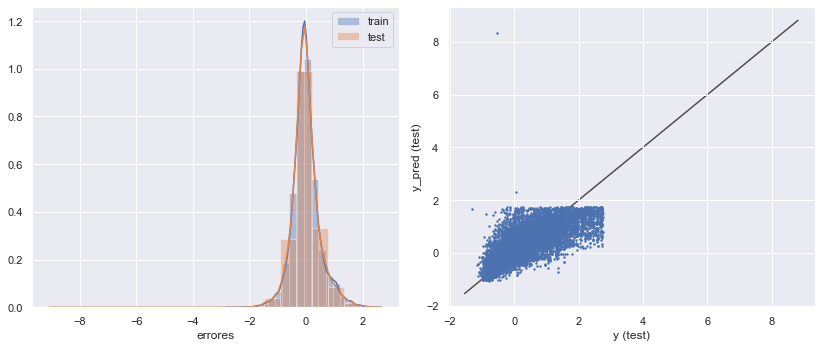

In [128]:
evaluar_regresion(reg_ridge, X,y, X_train_new, X_test_new, y_train, y_test)

##### 1.2.2 Se entrena el modelo **Lasso**

In [117]:
reg_lasso = Lasso()
reg_lasso.fit(X_train_new,y_train)

print(reg_lasso.coef_, reg_lasso.intercept_)

[ 0.          0.          0.         -0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.00100683  0.          0.
  0.02349501] [0.17581882]


Raíz del error cuadrático medio en Train: 0.7365610926160802
Raíz del error cuadrático medio en Test: 0.7359749279815043


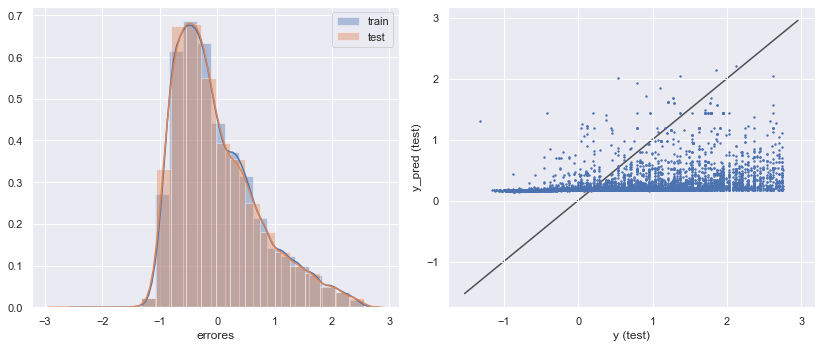

In [129]:
def evaluar_regresion_2(model,X,y, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train).reshape(53955,1)
    y_test_pred = model.predict(X_test).reshape(17985,1)
    
    # Calculamos el Error
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    ### Graficamos los Resultados
    plt.figure(figsize = (17,5))
    
    plt.subplot(1,3,2)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,3,3)
    ax.scatter(y_test,y_test_pred, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()
    
evaluar_regresion_2(reg_lasso, X,y, X_train_new, X_test_new, y_train, y_test)

* *El modelo __`Ridge` resultó ser más efectivo__ que Lasso, y ésto es porque la mayoría de los predictores elegidos influyen en la respuesta (superficie total y cubierta influyen sobre la determinación de los precios).*

#### 1.3 RandomSerch

##### 1.3.1 Se determina el mejor `alpha` para el modelo Ridge, por ser el que mejor resultado arrojó

In [119]:
#import scipy as sp

from sklearn.model_selection import RandomizedSearchCV # Búsqueda aleatoria en hiperparámetros.

In [120]:
ridge = Ridge()

In [121]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_ramdom = dict(alpha=alpha)
ramdom = RandomizedSearchCV(estimator=ridge, param_distributions=param_ramdom, verbose=1, n_jobs=-1, n_iter = 100)
ramdom_result = ramdom.fit(X_train_new, y_train)
print('Best Score: ', ramdom_result.best_score_)
print('Best Params: ', ramdom_result.best_params_)

C:\Users\Ale\anaconda3\envs\ds\lib\site-packages\sklearn\model_selection\_search.py:277: UserWarning: The total space of parameters 7 is smaller than n_iter=100. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.6186181532265925
Best Params:  {'alpha': 1}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    3.8s finished


In [122]:
scores = pd.DataFrame(ramdom.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.06,1.07e-06,3.13e-03,6.25e-03,0.001,{'alpha': 0.001},0.61,0.61,0.63,0.62,0.62,0.62,5.55e-03,4
1,0.05,7.65e-03,6.25e-03,7.65e-03,0.01,{'alpha': 0.01},0.61,0.61,0.63,0.62,0.62,0.62,5.55e-03,3
2,0.05,7.66e-03,9.37e-03,7.65e-03,0.1,{'alpha': 0.1},0.61,0.61,0.63,0.62,0.62,0.62,5.55e-03,2
3,0.05,7.65e-03,3.12e-03,6.25e-03,1,{'alpha': 1},0.61,0.61,0.63,0.62,0.62,0.62,5.53e-03,1
4,0.05,7.65e-03,9.37e-03,7.65e-03,10,{'alpha': 10},0.61,0.61,0.63,0.62,0.62,0.62,5.41e-03,5
5,0.05,7.66e-03,6.25e-03,7.65e-03,100,{'alpha': 100},0.61,0.61,0.62,0.62,0.61,0.62,5.23e-03,6
6,0.05,2.65e-06,9.37e-03,7.65e-03,1000,{'alpha': 1000},0.61,0.60,0.62,0.61,0.61,0.61,4.74e-03,7


##### 1.3.2 Se entrena el modelo Ridge con el `Best Params` según RandomSearch

* *El resultado obtenido, debería ser el mismo que en el modelo Ridge anteriormente entrenado y evaluado, ya que el alpha por default es 1.0, que es el resultante en éste caso de Best Params.*

In [123]:
reg_ridge_random = Ridge(alpha= 1.0)
reg_ridge_random.fit(X_train_new,y_train)

print(f'Pendientes: {reg_ridge.coef_}')
print(f'Ordenada: {reg_ridge.intercept_}')

Pendientes: [[-1.66720545e-01  8.64394655e-01  3.16524895e-01 -2.73574463e-02
  -4.37711851e-03  2.60032682e-02 -9.49205539e-01  1.57947230e+00
  -7.51232848e-01  6.32939709e-03 -3.23084465e-02  7.89538406e-03
   1.15564950e-03  8.16284356e-02 -4.77063497e-02  2.67344732e-01
  -6.55208135e-01  4.25774439e-01 -7.74615889e-02]]
Ordenada: [0.08661424]


In [124]:
y_train_pred_random = reg_ridge_random.predict(X_train_new)
y_test_pred_random = reg_ridge_random.predict(X_test_new)

In [125]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_random))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_random))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 0.4805357889420192
Raíz del error cuadrático medio en Test: 0.4831606207757135


* *Se confirma que los RMSE obtenidos son los mismos.*

### 2. XG-Boost

In [125]:
X = properati_7[['bedrooms','surface_total','surface_covered']]
y = properati_7[['price']]

In [126]:
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import GridSearchCV

In [128]:
# Separamos los datos en train y test (held-out)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGB Regresor
xgb = xgb.XGBRegressor(n_estimators=250, max_depht= 2, random_state=42)

In [129]:
# Entrenamos el modelo
xgb.fit(X_train, y_train, eval_metric=['error'])

[16:41:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depht } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depht=2,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=250, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [130]:
y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb = xgb.predict(X_test)

In [131]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 0.37979287572096354
Raíz del error cuadrático medio en Test: 0.42557313588514395


In [132]:
print(xgb.feature_importances_)

[0.08892336 0.69083476 0.22024187]


* *`Surface Total` es el atributo mas importante, el que mejor separa los datos.*

## PARTE C - Interpretación de modelos ##

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

* ¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

* ¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

## DESAFÍO OPCIONAL ##

Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?

### A. Clustering

In [133]:
from sklearn import preprocessing
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs, make_moons

* Utilizamos el dataset **properati_6**, ya que incluye el feature `l3`, que es sobre el cual vamos a trabajar para determinar los Clusters existentes.

In [134]:
dummies = pd.get_dummies(properati_6['l3'])
dummies.head()

,Abasto,Agronomía,Almagro,Balvanera,Barracas,Barrio Norte,Belgrano,Boca,Boedo,Caballito,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Dado que hemos creado un marco de datos completamente nuevo, para compararlo con nuestro marco de datos original, necesitaremos fusionarlos o concatenarlos para que funcionen correctamente. Al crear variables ficticias, básicamente creamos nuevas columnas para nuestro conjunto de datos original. El conjunto de datos antiguo y el nuevo no tienen ninguna columna en común, por lo que tendría más sentido concatenarlos (aunque voy a ir en ambos sentidos).

* Elegí poner mi variable ficticia en el lado derecho de mi marco de datos, así que cuando uso pd.concat (la función de concatenación) y pongo mi marco de datos primero, y luego la variable ficticia que declaré. Como son columnas, las concateno en el eje = 1.

In [135]:
barrios = pd.concat([properati_6,dummies], axis = 1)
barrios.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,2019-10-17,2019-12-23,2019-10-17,-34.61,-58.38,Argentina,Capital Federal,San Cristobal,7.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1,2019-10-17,2019-11-21,2019-10-17,-34.62,-58.41,Argentina,Capital Federal,Boedo,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2019-10-17,2019-11-01,2019-10-17,-34.59,-58.43,Argentina,Capital Federal,Palermo,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,2019-10-17,2019-12-23,2019-10-17,-34.58,-58.44,Argentina,Capital Federal,Palermo,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
5,2019-10-17,2019-11-01,2019-10-17,-34.59,-58.44,Argentina,Capital Federal,Villa Crespo,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0


* Combinar estos marcos de datos es un poco más difícil ya que no hay columnas superpuestas. ¡Sin embargo, se puede hacer!

In [136]:
X = barrios[['l3']]
y = barrios[['price']]

In [137]:
print (X)

                   l3
0       San Cristobal
1               Boedo
2             Palermo
3             Palermo
5        Villa Crespo
...               ...
146548        Palermo
146549        Palermo
146550        Palermo
146555        Palermo
146557        Palermo

[71940 rows x 1 columns]


* Determinamos el número de Centros.

In [139]:
n_samples = 71940
n_centros = 8
X, y = make_blobs(centers=n_centros, cluster_std=0.3, n_features=2, random_state=0)

* Graficamos los datasets

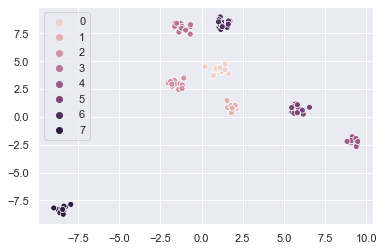

In [140]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y, legend ='full')
plt.show()

* Vamos a evaluar las particiones que realizamos mediante KMeans usando la distancia al centroide. La idea es que al variar el número de clúster K en el modelo, el valor de la distancia media de los datos al centroide más cercano va a variar. Queremos graficar esa curva para elegir el número de particiones óptimos con el metodo del codo.
* Preparamos una lista con las distancias medias a los centroides en el dataset 1. Vamos a probar un número de clústers que va de 2 a 14.

In [141]:
# Preparamos una lista donde vamos a ir agregando las distancias medias
lista_distancias_medias = []
# Entrenamos un modelo para cada numero de cluster que queremos testear
K = np.arange(2,14)
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    # Tomamos la suma de las distancias para todas las instancias del dataset
    distancia_total = km.inertia_
    # Inercia: la suma de la distancia al cuadrado de cada punto con su respectivo centroide
    
    # Calculamos la distancia media y agregamos a la lista
    distancia_media = distancia_total / n_samples
    lista_distancias_medias.append(distancia_media)
    # Distorsión: el promedio de todas las distancias de los centroides con sus respectivos puntos al cuadrado.

* Graficamos la distancia media en función del número de clústers.

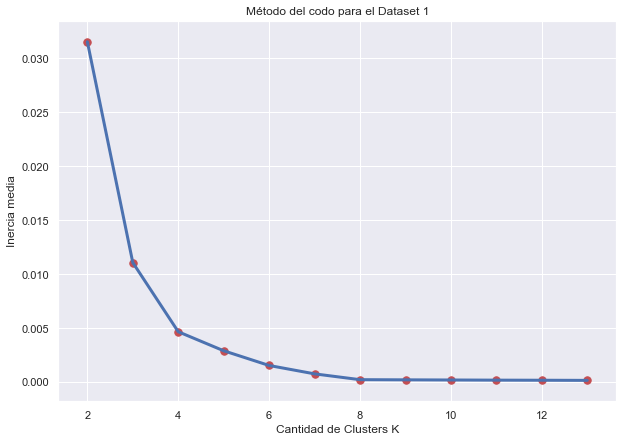

In [142]:
plt.figure(figsize = (10,7))
# Graficamos una linea continua y tambien unos puntos para resaltar los valores enteros de K.
plt.plot(K, lista_distancias_medias, lw=3)
plt.scatter(K, lista_distancias_medias, s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el Dataset 1')

plt.show()

* Usar el criterio para elegir el mejor numero de k en cada caso según la curva y graficar los clusters para cada dataset. Dejamos como ejemplo el dataset 3, donde de la curva tomamos el valor 6 como codo.

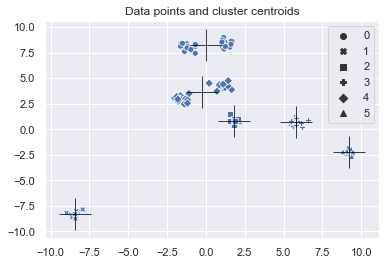

In [143]:
# Defino y entreno el modelo
km = KMeans(n_clusters=6)
km = km.fit(X)
# Obtengo la posición de los centros y las etiquetas
etiquetas_ = km.labels_
centros_ = km.cluster_centers_
# Plotting the cluster centers and the data points on a 2D plane
sns.scatterplot(X[:, 0], X[:, -1], style = etiquetas_)
sns.scatterplot(centros_[:, 0], centros_[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

### B. Silhouette

Vamos a evaluar las particiones que realizamos mediante el valor de silhouette. La idea es que al variar los parámetros de los modelos de clustering, cambiará la distribución del valor de Silhouettes en los datos. Con esa distribución debemos elegir los mejores parametros posibles (cohesión y separación).

__Nota 1:__ el coeficiente de Silhoutte va de -1 a 1.

__Nota 2:__ el Silhouette promedio también va del -1 al 1, donde en 1 los clusters están bien separados (es lo que solemos buscar), en 0 están cerca y en -1 el los clusters están mezclados. Esto nos da una idea de cuán buena es la separación en clusters.

7. Primero vamos a calcular únicamente el valor de silhouette promedio para distintos valores de K. La manera de hacerlo es igual a la que usamos para calcular los valores de distancia media, vamos a recorrer con un `for` los distintos modelos e ir agregando a una lista los valores. Esta vez, en lugar de calcular la distancia, vamos a calcular el valor de silhouette usando la función `silhouette_score`. Dejamos como ejemplo lo que sucede para el Dataset 2.

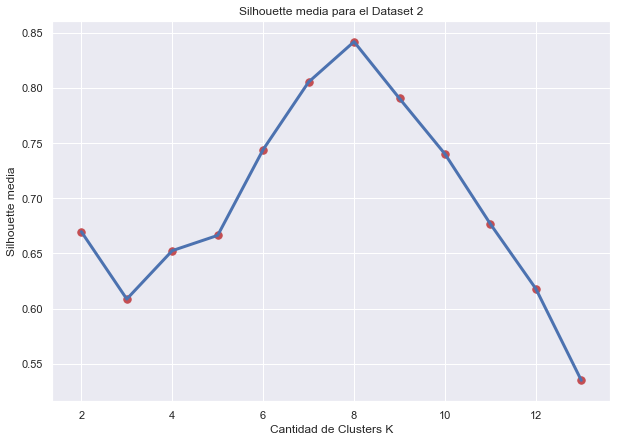

In [144]:
# Preparamos una lista donde vamos a ir agregando los valores medios de silhouette
lista_sil = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
for k in range(2,14):
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    
    # Tomamos las etiquetas
    etiquetas = km.labels_
    
    # Calculamos el silhouette 
    valor_medio_sil = silhouette_score(X, etiquetas)
    lista_sil.append(valor_medio_sil)
    
plt.figure(figsize = (10,7))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette media')
plt.title('Silhouette media para el Dataset 2')
plt.show()

* Es el Promedio de todas las siluetas para x cantidad de clusters.
* Se ve contrastado con la gráfica de silueta q se ve de costado, es la línea punteada que se ve en el próximo gráfico.

* A modo demostrativo, les dejaremos un bloque de código que genera los gráficos de Silhouette para todas las instancias. Noten que pueden sacar información de qué tan buenas fueron las particiones del perfil de silhouettes de cada cluster. La línea verde punteada indica el valor medio.

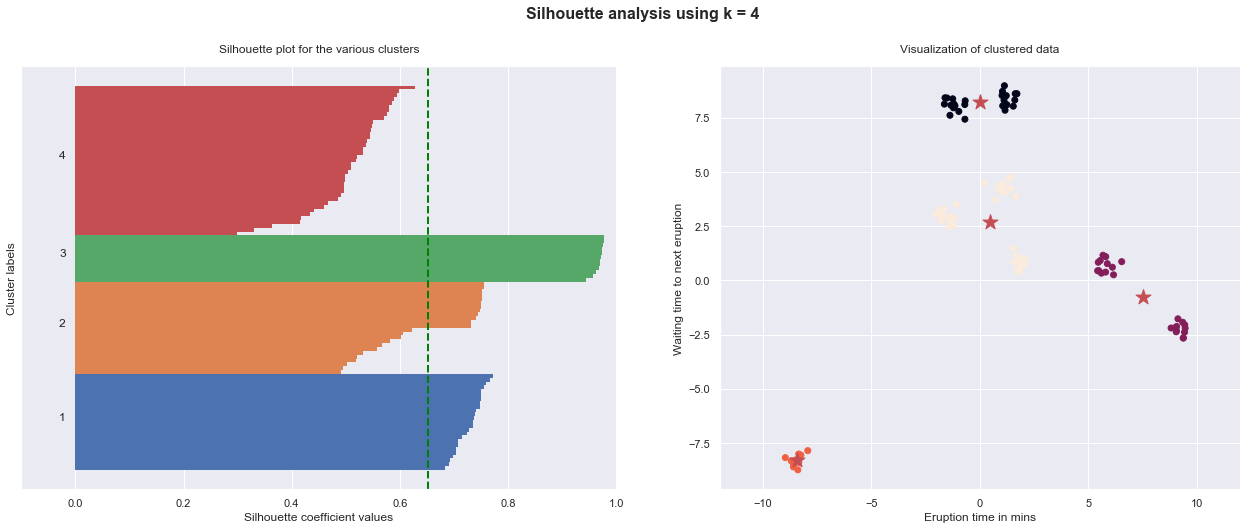

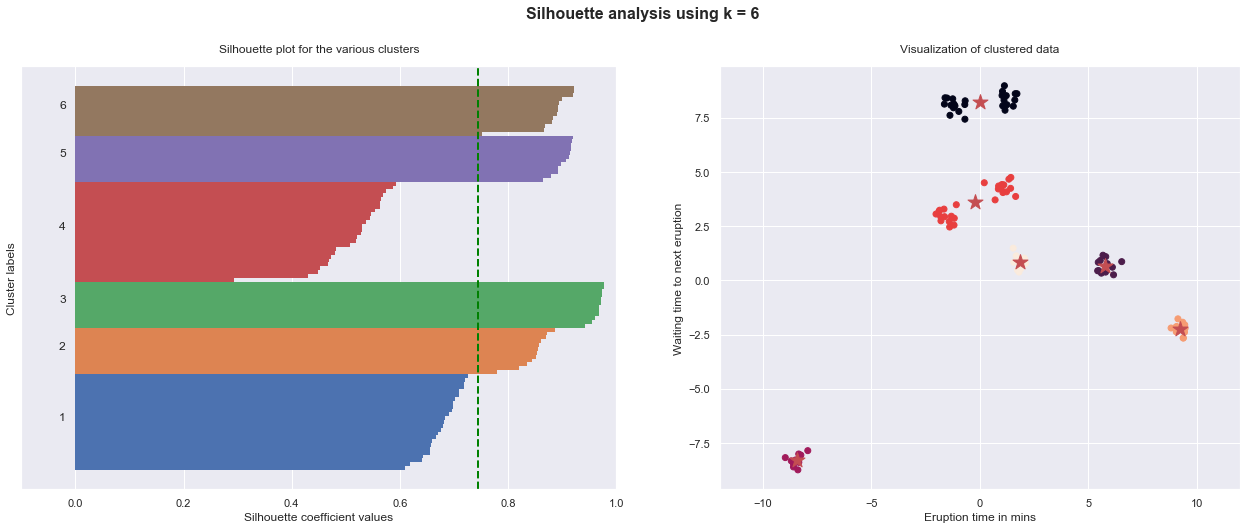

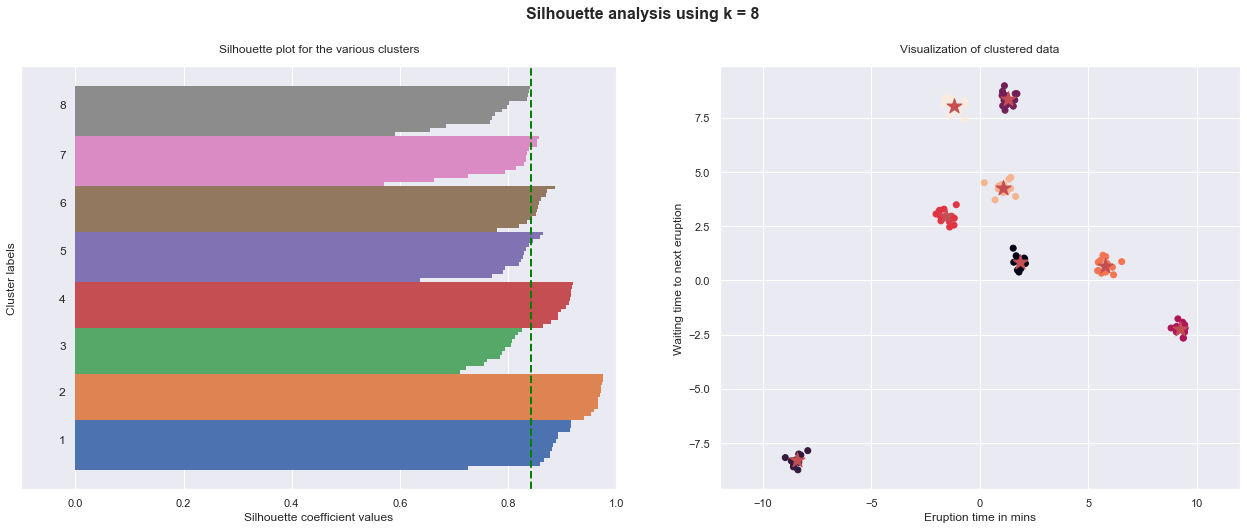

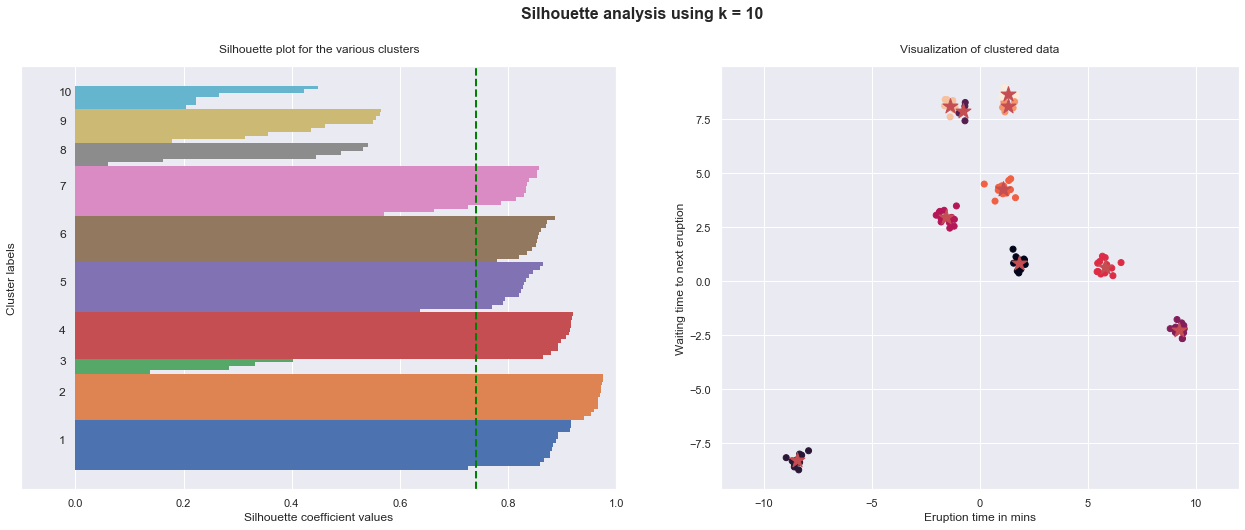

In [145]:
# Aca ponen el Dataset con el que quieren trabajar
X_std = X
# Aca definen la lista de ks para los cuales quieren hacer un gráfico
lista_k = [4, 6, 8, 10]

for i, k in enumerate(lista_k):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-12, 12])
    ax2.set_xlim([-12, 12])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

Para entender mejor el gráfico:

1. En el eje x está el valor de Silhouette, en el eje y los clusters.

2. El valor de silhouette de cada instancia está graficado como una barrita muy finita. Están todas las instancias graficadas, ordenadas de mayor a menor.

3. La línea punteada roja representa el Silhouette promedio de toda la partición

HACER CLUSTERING DE BARRIOS Y PRECIOS  
UNO COMPRA POR LO QUE PROPORCIONA EL BARRIO  
ESTRATIFICAR